## BLM442 Keşif aktivitesi-5: Makine Öğrenmesi

In [ ]:

#### Kullanılan dataset adı:International Futboll Result 1872-2020(soru1),Online Shoppers Purchasing Intention Dataset Data Set(soru2),
##Fifa 18 More Complete Player Dataset(soru3)
#### Dataset url:https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset(soru2),https://www.kaggle.com/kevinmh/fifa-18-more-complete-player-dataset(soru3)
###https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017(soru1)


#### Kısım 1 (Regresyon Analizi): Daha once kullanmıs oldugunuz (kesif aktivitesi 1 spreadsheet) veriseti üzerindeki kolonlar (Nümerik predictors ve nümerik cikti) arasındaki pozitif ve negatif korelasyonu bulunuz.  r veya R^2  değerlerini belirleyiniz.

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize']=(20.0,10.0)
#reading data
data=pd.read_csv('results.csv.zip')
print(data.shape)
data.head()

(41586, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [23]:
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [24]:
#veri analizinde kullanılacak özellikler
features = ['home_score','away_score']

In [31]:
#total_score adında numeric bir kolon oluşturma
def sum_frame_by_column(data, new_col_name, list_of_cols_to_sum):
    data[new_col_name] = data[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(data)

In [32]:
##home_score ile away_score değerlerini tek sutun altında birleştirdim
sum_frame_by_column(data, 'total_score', ['home_score','away_score'])


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_score
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0.0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6.0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3.0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4.0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3.0
...,...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True,5.0
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True,1.0
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True,1.0
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True,1.0


In [33]:
target = ['total_score']

In [35]:
bos_satir= data.isnull().any(axis=1).sum()
bos_satir

0

In [36]:
X = data[features]

In [38]:
y = data[target]

In [39]:
X.shape

(41586, 2)

In [40]:
X.iloc[20]

home_score    7
away_score    1
Name: 20, dtype: int64

In [41]:
y.head(50)

,total_score
0,0.0
1,6.0
2,3.0
3,4.0
4,3.0
5,4.0
6,4.0
7,2.0
8,9.0
9,9.0


In [64]:
#dataset egitim kümelerine ayırma işlemi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

In [65]:
#lineer regresyon
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
#lineer regresyon modeli tahmin yapma
y_prediction = regression.predict(X_test)
y_prediction

array([[1.],
       [3.],
       [2.],
       ...,
       [6.],
       [6.],
       [3.]])

In [67]:
#tahmin edilmesi gereken target degerleri ortalaması
y_test.describe()

,total_score
count,12476.000000
mean,2.942930
std,2.083149
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,22.000000


In [68]:
#Lineer Regresyon Modelinin Doğruluğunu Root Mean Square Error Kullanarak Bulma
#sonuc 0 çıkarsa modelimiz şahane bir tahmin yapmıiş demektir
from math import sqrt
rmse = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(rmse)

5.682961336839568e-14


In [69]:
regression = DecisionTreeRegressor(max_depth=20)
regression.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [70]:
y_prediction = regression.predict(X_test)
y_prediction

array([1., 3., 2., ..., 6., 6., 3.])

In [71]:
y_test.describe()

,total_score
count,12476.000000
mean,2.942930
std,2.083149
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,22.000000


In [73]:
rms = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(rms)

0.031013654182502317


In [ ]:
##karar ağacı modeli daha doğru bir tahmin sonucu verdi

In [74]:
X=data['home_score'].values
Y=data['away_score'].values

In [79]:
mean_x=np.mean(X)
mean_y=np.mean(Y)


m=len(X)

number=0
demo=0
for i in range(m):
    number+=(X[i]-mean_x)*(Y[i]-mean_y)
    demo+=(X[i]-mean_x)**2
b1=number/demo
b0=mean_y-(b1*mean_x)

print(b1,b0)


-0.10905480160179416 1.3779702193403707


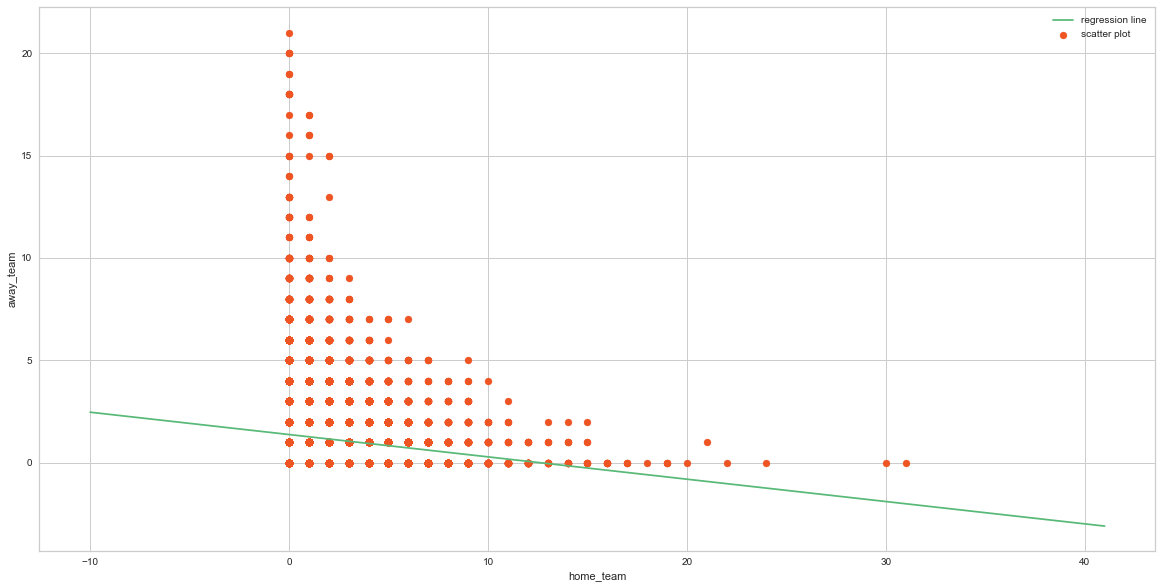

In [80]:
max_x=np.max(X)+10
min_x=np.min(X)-10


x=np.linspace(min_x,max_x,1000)
y=b0+b1*x

plt.plot(x,y,color='#58b978',label='regression line')

plt.scatter(X,Y,c='#ef5423',label='scatter plot')
plt.xlabel('home_team')
plt.ylabel('away_team')
plt.legend()
plt.show()


In [81]:
ss_t=0
ss_r=0
for i in range(m):
    y_pread=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pread)**2
r2=1-(ss_r/ss_t)
print(r2)
#r^2 değeri

0.018521978728570643


#### Kısım 2 (Ekteki verisetlerinden biri üzerinde herhangi bir sınıflandırma algoritması gerçekleme) Sectiginiz verisetini Google Drive'da belirtiniz. Her kişi farklı veriseti seçmelidir. Veriseti üzerinde gerekiyorsa birtakım önişlemler yapılmalı, bir sınıflandırma modeli olusturularak modelin performansı çeşitli metriklerle sunulmalıdır.

https://docs.google.com/spreadsheets/d/19g8vDmC20FQGo2t-NQNb1MD6jwcJvfIJXwxl7vQCIlA/edit?usp=sharing

# classification algorithm

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier

In [7]:
data = pd.read_csv('online_shoppers_intention (1).csv')
data.shape


(12330, 18)

In [8]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


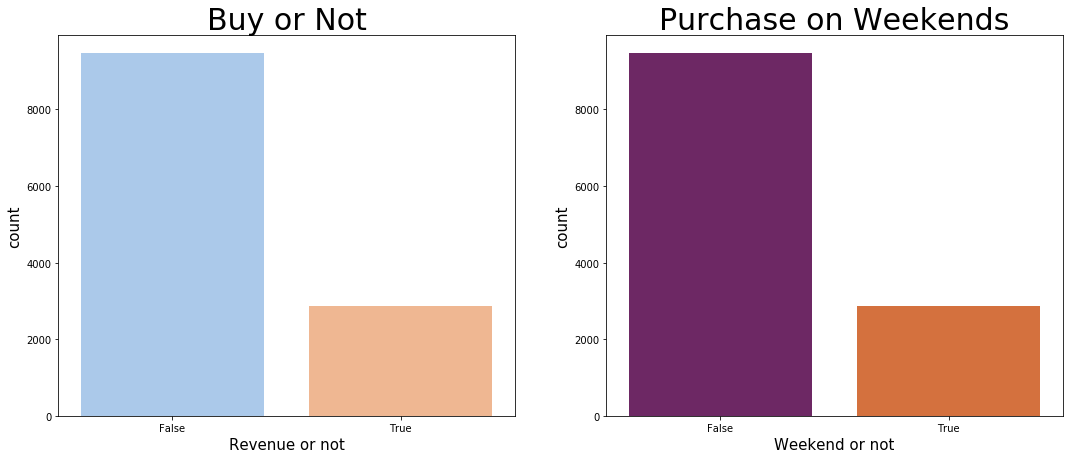

In [9]:
# gelir üzerinden müşteri dağılımını kontrol etmek

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(data['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# hafta sonu üzerinden müşteri dağılımını kontrol etmek
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

In [10]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [11]:
#her kullanınıcı sahip oldupu isletim sistemi sayısı
data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [12]:
#cevrimici alışveriş sitelerini ziyaret eden müşterilerin daha çok hangi aylarda alışveriş yaptığını kontrol etme

data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

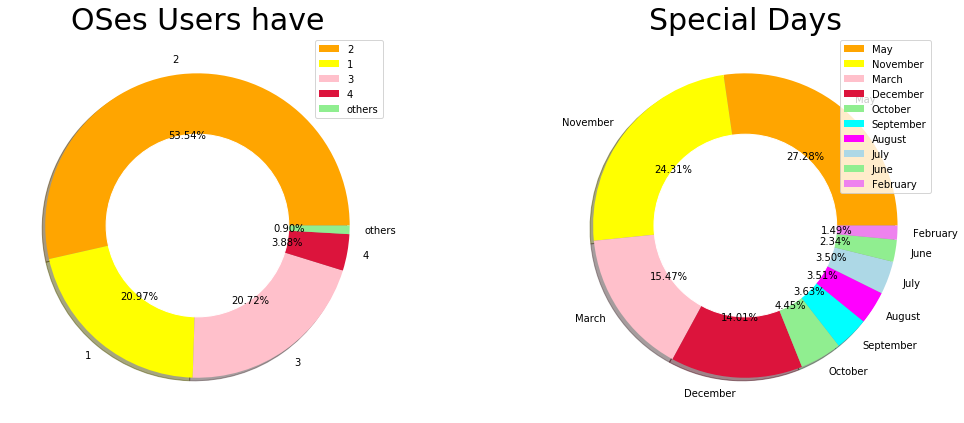

In [13]:
# ay varyasyonlarına göre halka grafik oluşturma

# kullanıcaların sahip olduğu farklı işletim sistemleri için pasta grafik çizme

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

#özel günlerin paylaşımı için pasta grafik çizme

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

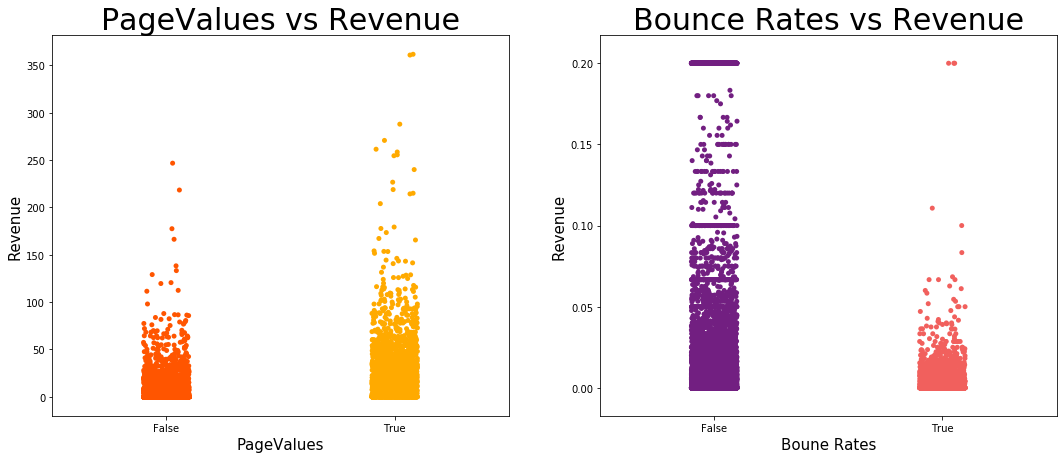

In [14]:
#page values vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(data['Revenue'], data['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.stripplot(data['Revenue'], data['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

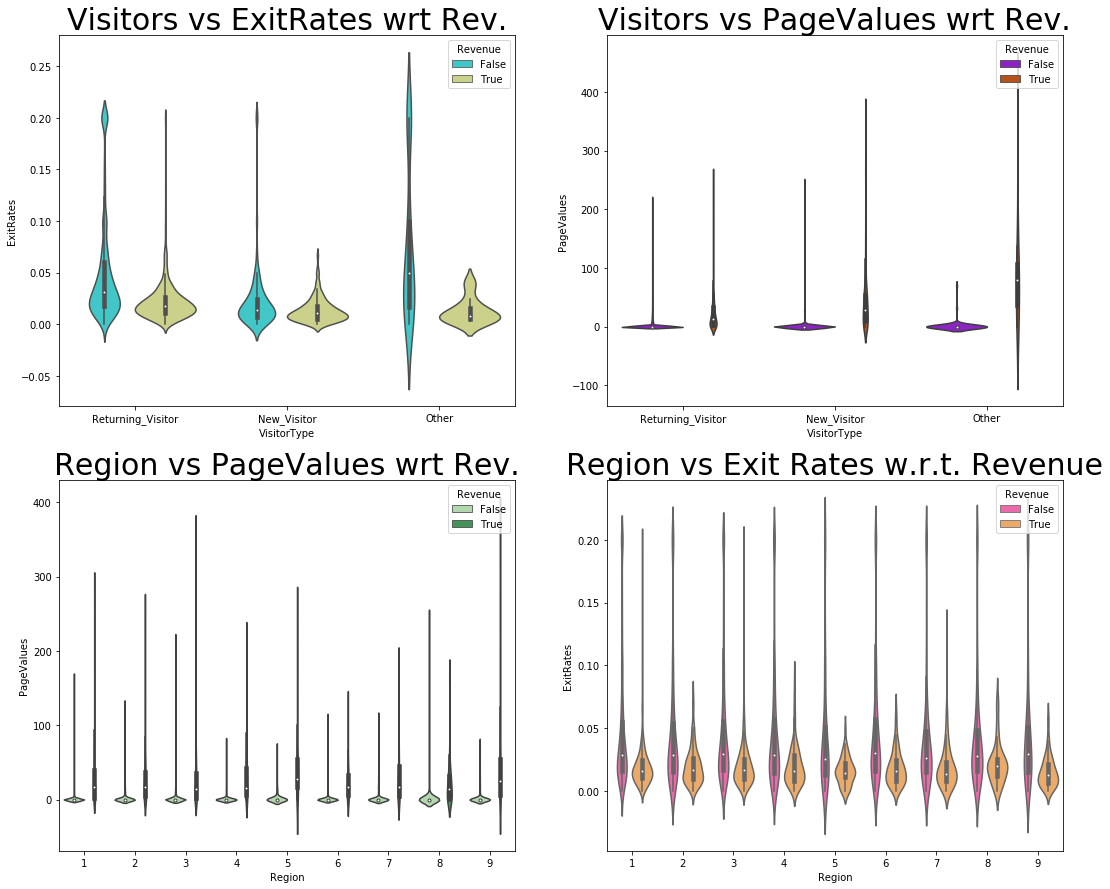

In [15]:
# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.violinplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.', fontsize = 30)

# region vs pagevalues w.r.t. revenue
plt.subplot(2, 2, 3)
sns.violinplot(x = data['Region'], y = data['PageValues'], hue = data['Revenue'], palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 30)

#region vs exit rates w.r.t. revenue
plt.subplot(2, 2, 4)
sns.violinplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)
plt.show()

In [16]:
# one hot encoding 
data1 = pd.get_dummies(data)
data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [17]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [18]:
# getting dependent and independent variables

x = data1
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = data['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 28)
Shape of y: (12330,)


In [20]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


Training Accuracy : 1.0
Testing Accuracy : 0.8924033522573669
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3077
           1       0.74      0.55      0.63       622

    accuracy                           0.89      3699
   macro avg       0.83      0.76      0.78      3699
weighted avg       0.88      0.89      0.89      3699



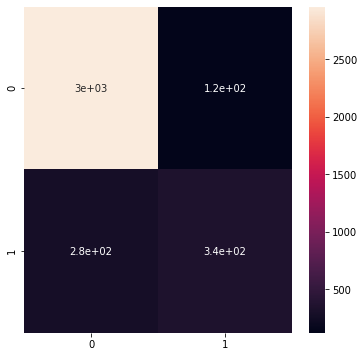

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [40]:
df=data.copy()
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


In [41]:
dummiesdf = pd.get_dummies(df['VisitorType'])
df.drop('VisitorType', inplace = True, axis = 1)
df['New_Visitor'] = dummiesdf['New_Visitor']
df['Other'] = dummiesdf['Other']
df['Returning_Visitor'] = dummiesdf['Returning_Visitor']


In [42]:
dfmonth = pd.get_dummies(df['Month']) 
df.drop('Month', inplace = True, axis = 1)
dfwithdummies = pd.concat([df, dfmonth], axis = 1, sort = False)

In [43]:
dfwithdummies['Class'] = df['Revenue'].astype(int)
dfwithdummies.drop('Revenue', axis = 1, inplace = True)
dfwithdummies['Weekend'] = df['Weekend'].astype(int)
dfwithdummies.drop('Returning_Visitor', axis = 1, inplace = True)
dfcleaned = dfwithdummies.copy()

In [44]:
X = dfcleaned.drop('Class', axis = 1)
Y = dfcleaned['Class'].copy()

In [45]:
#featurea arası ilişkiyi kontrol etmek ve feature boyutunu artırmak
cor = X.corr()

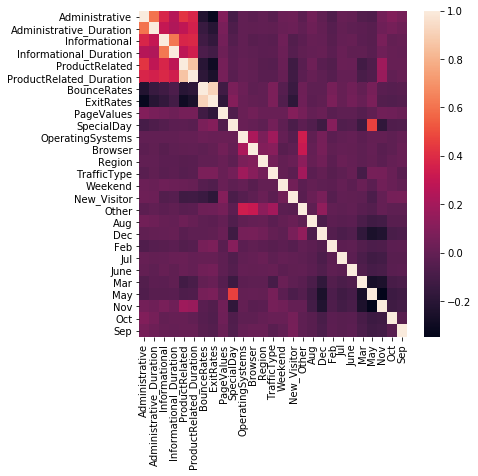

In [46]:
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns)

In [47]:
# dfcleaned[dfcleaned['New_Visitor'] == 1]['Administrative'].value_counts()
def AvgMinutes(Count, Duration):
    if Duration == 0:
        output = 0
    elif Duration != 0:
        output = float(Duration)/float(Count)
    return output
    
Columns = [['Administrative', 'Administrative_Duration'], ['Informational', 'Informational_Duration'], ['ProductRelated', 'ProductRelated_Duration']]
    
    
X['AvgAdministrative'] = X.apply(lambda x: AvgMinutes(Count = x['Administrative'], Duration = x['Administrative_Duration']), axis = 1)
X['AvgInformational'] = X.apply(lambda x: AvgMinutes(Count = x['Informational'], Duration = x['Informational_Duration']), axis = 1)
X['AvgProductRelated'] = X.apply(lambda x: AvgMinutes(Count = x['ProductRelated'], Duration = x['ProductRelated_Duration']), axis = 1)
X.drop(['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration'], axis = 1, inplace = True)

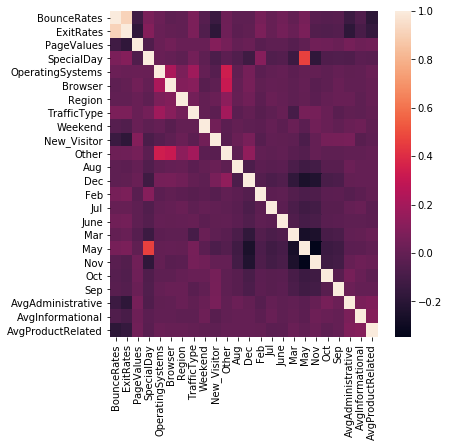

In [48]:
cor = X.corr()
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns)

In [49]:
# Checking for NA values
for i in X.columns:
    print('Feature:',i)
    print('# of N/A:',X[i].isna().sum())

Feature: BounceRates
# of N/A: 0
Feature: ExitRates
# of N/A: 0
Feature: PageValues
# of N/A: 0
Feature: SpecialDay
# of N/A: 0
Feature: OperatingSystems
# of N/A: 0
Feature: Browser
# of N/A: 0
Feature: Region
# of N/A: 0
Feature: TrafficType
# of N/A: 0
Feature: Weekend
# of N/A: 0
Feature: New_Visitor
# of N/A: 0
Feature: Other
# of N/A: 0
Feature: Aug
# of N/A: 0
Feature: Dec
# of N/A: 0
Feature: Feb
# of N/A: 0
Feature: Jul
# of N/A: 0
Feature: June
# of N/A: 0
Feature: Mar
# of N/A: 0
Feature: May
# of N/A: 0
Feature: Nov
# of N/A: 0
Feature: Oct
# of N/A: 0
Feature: Sep
# of N/A: 0
Feature: AvgAdministrative
# of N/A: 0
Feature: AvgInformational
# of N/A: 0
Feature: AvgProductRelated
# of N/A: 0


In [50]:
for i in data.columns:
    print('####################')
    print('COLUMN TITLE:',i)
    print('# UNIQUE VALUES:',len(data[i].unique()))
    print('UNIQUE VALUES:',data[i].unique())
    print('####################')
    print()

####################
COLUMN TITLE: Administrative
# UNIQUE VALUES: 27
UNIQUE VALUES: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
####################

####################
COLUMN TITLE: Administrative_Duration
# UNIQUE VALUES: 3335
UNIQUE VALUES: [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
####################

####################
COLUMN TITLE: Informational
# UNIQUE VALUES: 17
UNIQUE VALUES: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
####################

####################
COLUMN TITLE: Informational_Duration
# UNIQUE VALUES: 1258
UNIQUE VALUES: [  0.   120.    16.   ... 547.75 368.25 211.25]
####################

####################
COLUMN TITLE: ProductRelated
# UNIQUE VALUES: 311
UNIQUE VALUES: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29

In [55]:
from sklearn import linear_model
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2)

In [56]:
model = linear_model.SGDClassifier()
model.fit(X_train, y_train)
#linear model

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
y_pred = model.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8775344687753447

In [59]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7273022920787822

In [62]:
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
list_one =[]
feature_ranking = SelectKBest(chi2, k=5)
fit = feature_ranking.fit(X, Y)

fmt = '%-8s%-20s%s'

for i, (score, feature) in enumerate(zip(feature_ranking.scores_, X.columns)):
    list_one.append((score, feature))
    
dfObj = pd.DataFrame(list_one) 
dfObj.sort_values(by=[0], ascending = False)

,0,1
2,175126.808512,PageValues
22,10662.599140,AvgInformational
21,6829.412944,AvgAdministrative
23,1143.263922,AvgProductRelated
18,223.548231,Nov
9,115.339482,New_Visitor
17,54.997108,May
3,53.797094,SpecialDay
16,42.613274,Mar
0,29.654336,BounceRates


In [64]:
X.drop(['Aug','TrafficType','OperatingSystems','Other','Jul'],axis=1,inplace=True)

In [65]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y,test_size=.2)

In [66]:
clf1 = RandomForestClassifier(n_estimators= 200, max_depth = 30 )
clf1.fit(X_train1, y_train1)
y_pred2 = clf1.predict(X_test1)

In [67]:
accuracy_score(y_test1, y_pred2)

0.8998377939983779

In [68]:
roc_auc_score(y_test1, y_pred2)

0.7663832147148535

#### Kısım 3 (Dünya kupası verini kumeleme) Herhangi bir kümeleme yontemi ile kumelenmeli ve modelin performansı sunulmalıdır.

# Yüksek veya düşük hareket sprint hızı ve hareket çevikliği olan tüm futbolcuları K-Means algoritması kullanarak gruplandırmak


https://www.kaggle.com/oliversinn/fifa-18-visualisation-clustering-ml/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
fifa= pd.read_csv("complete.csv.zip")
pd.set_option('display.max_columns',None)
fifa

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.0,

In [3]:
df= fifa.copy()

# Null degerlerin kontrolü

In [4]:
null_col = [
    #'work_rate_def',
    #'work_rate_att',
    'preferred_foot',

    
]
df = df.dropna(subset=null_col)

for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col, ' = ', df[col].isnull().sum())

club  =  253
club_logo  =  253
league  =  253
eur_release_clause  =  1494
rs  =  2021
rw  =  2021
rf  =  2021
ram  =  2021
rcm  =  2021
rm  =  2021
rdm  =  2021
rcb  =  2021
rb  =  2021
rwb  =  2021
st  =  2021
lw  =  2021
cf  =  2021
cam  =  2021
cm  =  2021
lm  =  2021
cdm  =  2021
cb  =  2021
lb  =  2021
lwb  =  2021
ls  =  2021
lf  =  2021
lam  =  2021
lcm  =  2021
ldm  =  2021
lcb  =  2021
gk  =  15973


In [5]:
coloumns=[
    'club',
    'club_logo',
    'league',
    'eur_release_clause',
]
str_columns=[
    'rs',
    'rw',
    'rf',
    'ram',
    'rcm',
    'rm',
    'rdm',
    'rcb',
    'rb',
    'rwb',
    'st',
    'lw',
    'cf',
    'cam',
    'cm',
    'lm',
    'cdm',
    'cb',
    'lb',
    'lwb',
    'ls',
    'lf',
    'lam',
    'lcm',
    'ldm',
    'lcb',
    'gk',
  
    
]
for col in coloumns:
    df.loc[df[col].isnull(), col] = 0
    
for col in str_columns:
    df.loc[df[col].isnull(), col] = '0'
    
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col, ' = ', df[col].isnull().sum())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17994 entries, 0 to 17993
Columns: 185 entries, ID to prefers_gk
dtypes: bool(92), float64(5), int64(48), object(40)
memory usage: 14.5+ MB


In [7]:
print(df.isnull().sum().sort_values(ascending=False))
pd.set_option('display.max_columns',None)

prefers_gk                 0
penalties                  0
gk_reflexes                0
gk_positioning             0
gk_kicking                 0
                          ..
injury_free_trait          0
inflexible_trait           0
giant_throw_in_trait       0
gk_up_for_corners_trait    0
ID                         0
Length: 185, dtype: int64


In [8]:
for cols in df.columns: 
    print(cols)

ID
name
full_name
club
club_logo
special
age
league
birth_date
height_cm
weight_kg
body_type
real_face
flag
nationality
photo
eur_value
eur_wage
eur_release_clause
overall
potential
pac
sho
pas
dri
def
phy
international_reputation
skill_moves
weak_foot
work_rate_att
work_rate_def
preferred_foot
crossing
finishing
heading_accuracy
short_passing
volleys
dribbling
curve
free_kick_accuracy
long_passing
ball_control
acceleration
sprint_speed
agility
reactions
balance
shot_power
jumping
stamina
strength
long_shots
aggression
interceptions
positioning
vision
penalties
composure
marking
standing_tackle
sliding_tackle
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes
rs
rw
rf
ram
rcm
rm
rdm
rcb
rb
rwb
st
lw
cf
cam
cm
lm
cdm
cb
lb
lwb
ls
lf
lam
lcm
ldm
lcb
gk
1_on_1_rush_trait
acrobatic_clearance_trait
argues_with_officials_trait
avoids_using_weaker_foot_trait
backs_into_player_trait
bicycle_kicks_trait
cautious_with_crosses_trait
chip_shot_trait
chipped_penalty_trait
comes_for_crosses

In [9]:
coluums=[
        'age',
        'eur_value',
        'eur_wage',
        'international_reputation',
        'ID',
        'club_logo',
        'full_name',
        'nationality',
        'club',
         
        'preferred_foot',
        'body_type',
        'real_face',
        'release_clause_eur',
        'overall',
        'potential',
        'pac',
        'sho',
        'pas',
        'dri',
        'def',
        'phy',
        'international_reputation',
        'skill_moves',
        'weak_foot',
        'work_rate_att',
        'work_rate_def',
        'preferred_foot',
        'crossing',
        'finishing',
        'heading_accurac',
        'short_passing',
        'volleys',
        'dribbling',
        'curve',
        'free_kick_accuracy',
        'long_passing',
        'ball_control',
        'acceleration',
        'sprint_speed',
        'agility',
        'reactions',
        'balance',
        'shot_power',
        'jumping',
        'stamina',
        'strength',
        'long_shots',
        'aggression',
        'interceptions',
        'positioning',
        'vision',
        'penalties',
        'composure',
        'marking',
        'standing_tackle',
        'sliding_tackle',
        'gk_diving',
        'gk_handling',
        'gk_kicking',
        'gk_positioning',
        'gk_reflexes',
        'rs',
        'rw',
        'rf',
        'ram',
        'rcm',
        'rm',
        'rdm',
        'rcb',
        'rb',
        'rwb',
        'st',
        'lw',
        'cf',
        'cam',
        'cm',
        'lm',
        'cdm',
        'cb',
        'lb',
        'lwb',
        'ls',
        'lf',
        'lam',
        'lcm',
        'ldm',
        'lcb',
        'gk',
        '1_on_1_rush_trait',
        'acrobatic_clearance_trait',
        'argues_with_officials_trait',
        'avoids_using_weaker_foot_trait',
        'backs_into_player_trait',
        'bicycle_kicks_trait',
        'cautious_with_crosses_trait',
        'chip_shot_trait',
        'chipped_penalty_trait',
        'comes_for_crosses_trait',
        'corner_specialist_trait',
        'diver_trait',
        'dives_into_tackles_trait',
        'diving_header_trait',
        'driven_pass_trait',
        'early_crosser_trait',
        'fan''s_favourite_trait',
        'fancy_flicks_trait',
        'finesse_shot_trait',
        'flair_trait',
        'flair_passes_trait',
        'gk_flat_kick_trait',
        'gk_long_throw_trait',
        'gk_up_for_corners_trait',
        'giant_throw_in_trait',
        'inflexible_trait',
        'injury_free_trait',
        'injury_prone_trait',
        'leadership_trait',
        'long_passer_trait',
        'long_shot_taker_trait',
        'long_throw_in_trait',
        'one_club_player_trait',
        'outside_foot_shot_trait',
        'playmaker_trait',
        'power_free_kick_trait',
        'power_header_trait',
        'puncher_trait',
        'rushes_out_of_goal_trait',
        'saves_with_feet_trait',
        'second_wind_trait',
        'selfish_trait',
        'skilled_dribbling_trait',
        'stutter_penalty_trait',
        'swerve_pass_trait',
        'takes_finesse_free_kicks_trait',
        'target_forward_trait',
        'team_player_trait',
        'technical_dribbler_trait',
        'tries_to_beat_defensive_line_trait',
        'poacher_speciality',
        'speedster_speciality',
        'aerial_threat_speciality',
        'dribbler_speciality',
        'playmaker_speciality',
        'engine_speciality',
        'distance_shooter_speciality',
        'crosser_speciality',
        'free_kick_specialist_speciality',
        'tackling_speciality',
        'tactician_speciality',
        'acrobat_speciality',
        'strength_speciality',
        'clinical_finisher_speciality',
        

]
for col in coloumns:
    df = df.drop(col, axis=1)

for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col, ' = ', df[col].isnull().sum())

In [10]:
coloumns = [
    'sprint_speed',
    'agility',
]

df_k_means = pd.DataFrame()

for col in coloumns:
    df_k_means[col] = df[col]

In [11]:
df_k_means

,sprint_speed,agility
0,91,89
1,87,90
2,90,96
3,77,86
4,61,52
...,...,...
17989,32,38
17990,25,35
17991,51,60
17992,58,58


In [12]:
df_k_means = df_k_means.reset_index()

# Çizilmesi gereken en uygun sentroid sayısını bulmak için kullanılır

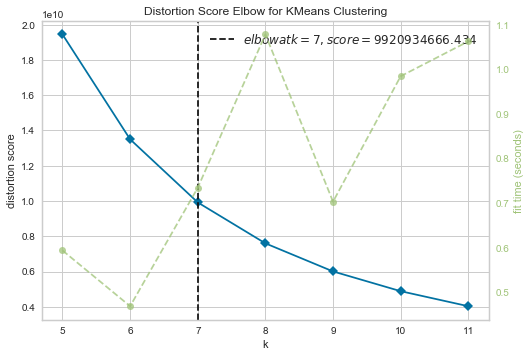

In [13]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,12))
visualizer.fit(df_k_means)
visualizer.show()

# Modelleme K-means algoritmasını kullanır. K-means verileri sentroid mesafeye göre sınıflandıran bir algoritmadır.

In [14]:
k = 7
x = df_k_means["sprint_speed"]
y = df_k_means["agility"]
def initiate():    
    pointx = []
    pointy = []
    for i in range(k) :
        r = (np.random.randint(df_k_means.shape[0]))
        pointx.append(x[r])
        pointy.append(y[r])
    return(pointx, pointy)
print(initiate())

([78, 62, 73, 61, 65, 70, 62], [77, 65, 72, 45, 65, 47, 65])


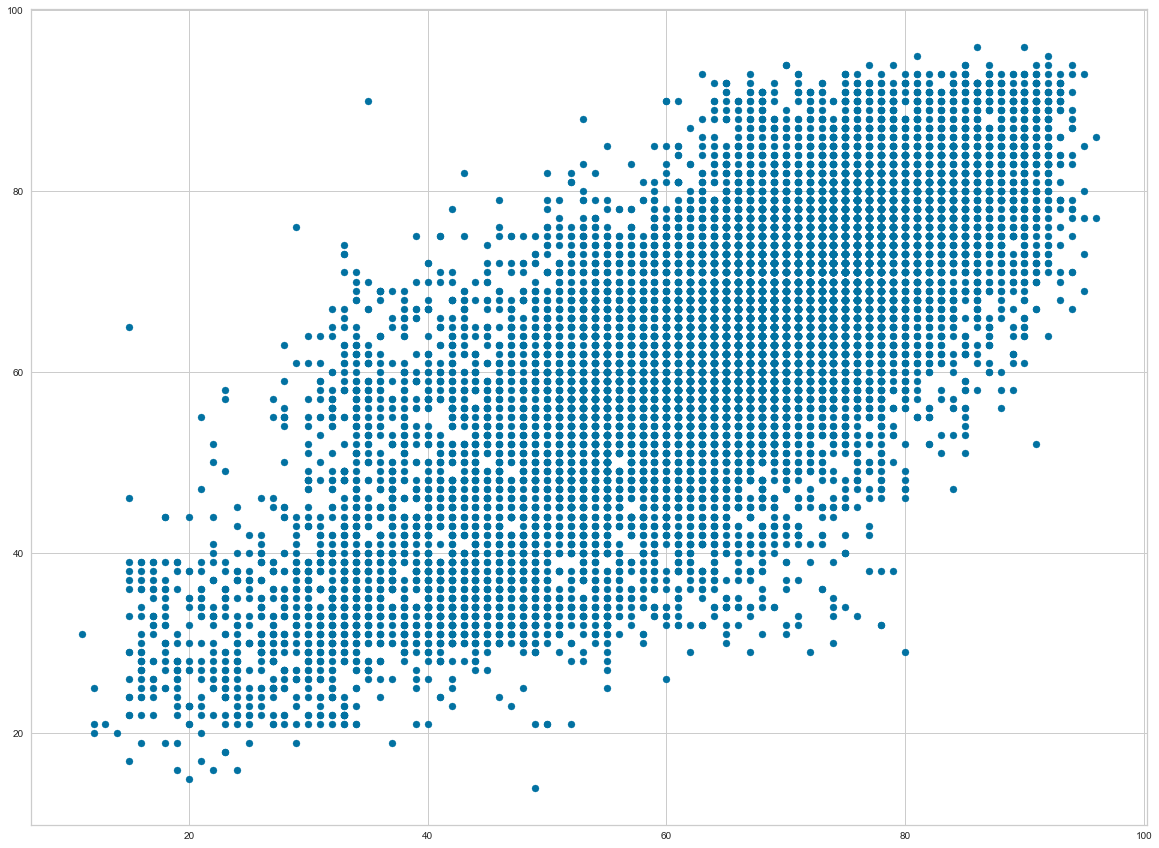

In [15]:
plt.figure(figsize=(20,15))
plt.scatter(x,y)

In [16]:
def dist_func(pointx,pointy):
    distance = []
    for i in range(df_k_means.shape[0]) :
        d = []
        for j in range(k) :
            dist = np.sqrt((pointx[j]-x[i])**2 + (pointy[j]-y[i])**2)
            d.append(dist)
        distance.append(d)
    return distance
# print(dist_func(pointx,pointy))

In [17]:
def min_func(distance):
    minimal = []
    for i in range(df_k_means.shape[0]):
        minimal.append(distance[i].index(min(distance[i])))
    return minimal


In [18]:
def new_centroid(minimal):
    pointx = []
    pointy = []
    for i in range(k):
        sumX = 0
        sumY = 0
        inc = 0
        for j in range(df_k_means.shape[0]):
            if minimal[j] == i:
                sumX += x[j]
                sumY += y[j]
                inc += 1
        if inc != 0 :
            pointx.append((sumX/inc))
            pointy.append((sumY/inc))
        if inc == 0:
            pointx.append(0)
            pointy.append(0)
    return pointx, pointy

 #print(new_centroid(min_func(dist_func(pointx,pointy))))

In [19]:
init = initiate()
pointx = init[0]
pointy = init[1]
prepointx = []
prepointy = []
i = 1
while ((prepointx != pointx) or (prepointy != pointy)) :
    i += 1
    prepointx = pointx
    prepointy = pointy
    distance = dist_func(pointx,pointy)
    minimal = min_func(distance)
#     print(minimal)
    centroid = new_centroid(minimal)
#     print(centroid)
    pointx = centroid[0]
    pointy = centroid[1]
print(minimal)
print(centroid)

[1, 1, 1, 1, 6, 1, 6, 1, 3, 2, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 0, 1, 1, 1, 6, 2, 6, 6, 0, 6, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 0, 5, 6, 0, 2, 1, 0, 1, 2, 1, 2, 3, 1, 1, 6, 0, 6, 1, 3, 1, 2, 6, 1, 6, 1, 6, 3, 1, 2, 2, 6, 1, 0, 1, 3, 1, 5, 3, 5, 5, 1, 0, 2, 1, 1, 1, 6, 2, 3, 2, 6, 6, 2, 1, 1, 6, 2, 1, 1, 1, 2, 6, 5, 2, 6, 0, 6, 6, 1, 5, 3, 1, 6, 1, 6, 5, 3, 0, 6, 0, 2, 6, 1, 1, 6, 1, 1, 0, 6, 3, 1, 1, 5, 6, 1, 2, 1, 1, 1, 2, 5, 2, 1, 6, 1, 6, 2, 6, 6, 0, 6, 2, 1, 1, 0, 0, 3, 0, 1, 5, 2, 1, 5, 0, 2, 1, 0, 1, 1, 2, 1, 6, 0, 3, 3, 0, 0, 0, 2, 3, 1, 6, 1, 0, 6, 0, 5, 0, 0, 0, 1, 0, 6, 1, 6, 3, 3, 1, 2, 0, 1, 1, 1, 6, 1, 1, 0, 1, 1, 1, 0, 6, 2, 0, 2, 3, 0, 2, 1, 6, 2, 1, 1, 2, 1, 1, 1, 1, 6, 0, 1, 1, 5, 3, 1, 1, 6, 1, 5, 1, 6, 1, 1, 1, 1, 3, 0, 1, 1, 0, 2, 0, 3, 0, 1, 2, 0, 0, 4, 3, 0, 6, 1, 4, 3, 6, 1, 3, 6, 1, 1, 3, 5, 6, 2, 2, 1, 4, 0, 1, 6, 0, 3, 0, 5, 5, 5, 2, 1, 0, 0, 0, 0, 1, 4, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 3, 2, 0, 1, 1, 0, 1, 1, 1, 6, 1, 1, 3, 1, 2, 1, 1, 2, 5, 2, 1, 2, 2, 1, 1, 

In [20]:
df_final = pd.DataFrame()
df_final['sprint_speed'] = x
df_final['agility'] = y
df_final['cluster'] = minimal

<function matplotlib.pyplot.show(*args, **kw)>

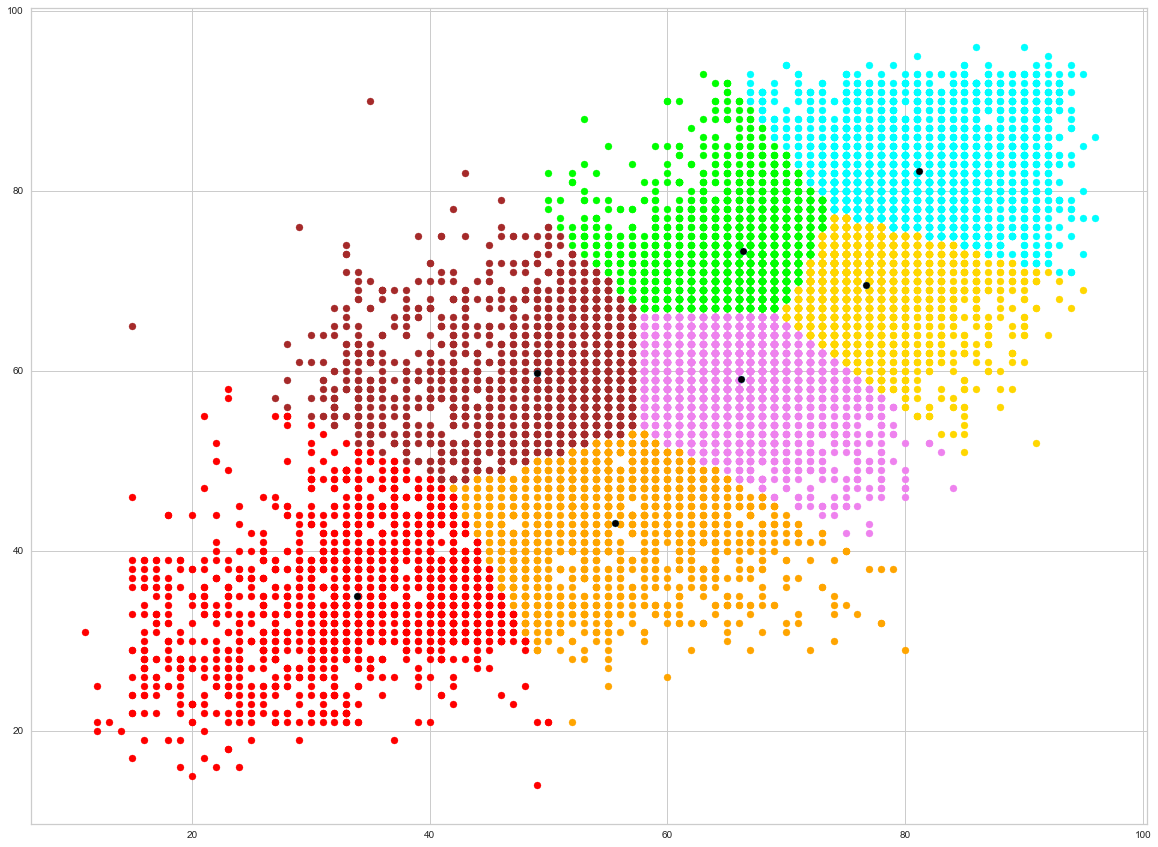

In [21]:
plt.figure(figsize=(20,15))
# arr_color = ['bo','ro','go','co','mo','yo','gold']
#colors = ['gold', 'blue', 'violet', 'brown', 'orange', 'red', 'lime', 'cyan', 'orange', 'gray']

colors = ['lime', 'cyan', 'gold', 'brown', 'red', 'orange', 'violet', 'gray', 'orange', 'blue']


for i in range(k):
    plt.scatter(df_final[df_final['cluster'] == i].sprint_speed,df_final[df_final['cluster'] == i].agility, c=colors[i])

for i in range(k):
#     plt.plot(km.cluster_centers_[i][0], km.cluster_centers_[i][1], 'rD', label="Fast")
    plt.scatter(centroid[0][i], centroid[1][i], c='black' ,edgecolors='b')

plt.show